In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import piplite
await piplite.install('seaborn')
import seaborn as sns

In [2]:
df = pd.read_csv('amazon-forst.csv')
df.head()
                   

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [3]:
df.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


In [4]:
df.dtypes

year        int64
state      object
month      object
number    float64
date       object
dtype: object

In [8]:
df.shape

(6454, 5)

In [9]:
df.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [10]:
df.duplicated().sum()

33

In [11]:
df=df.drop_duplicates()

In [12]:
df.shape

(6421, 5)

In [13]:
df.describe(include="all")

,year,state,month,number,date
count,6421.000000,6421,6421,6421.000000,6421
unique,NaN,23,12,NaN,NaN
top,NaN,Rio,Setembro,NaN,NaN
freq,NaN,696,540,NaN,NaN
mean,2007.490734,NaN,NaN,108.773867,2007-06-29 08:42:59.037533184
min,1998.000000,NaN,NaN,0.000000,1998-01-01 00:00:00
25%,2003.000000,NaN,NaN,3.000000,2003-01-01 00:00:00
50%,2007.000000,NaN,NaN,24.000000,2007-01-01 00:00:00
75%,2012.000000,NaN,NaN,114.000000,2012-01-01 00:00:00
max,2017.000000,NaN,NaN,998.000000,2017-01-01 00:00:00


In [14]:
# Rename Month To English
df['month'].unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [15]:
df['month-eng']=df['month'].replace({'Janeiro':'January', 
                                 'Fevereiro': 'February', 
                                 'Março' : 'March',
                                 'Abril': 'April', 
                                 'Maio': 'May',
                                 'Junho': 'June',
                                 'Julho': 'July',
                                 'Agosto': 'August', 
                                 'Setembro' : 'September', 
                                 'Outubro' : 'October',
                                 'Novembro': 'November', 
                                 'Dezembro': 'December'})

In [16]:
df['month-eng']

0        January
1        January
2        January
3        January
4        January
          ...   
6449    December
6450    December
6451    December
6452    December
6453    December
Name: month-eng, Length: 6421, dtype: object

Text(0, 0.5, 'no. of Fire')

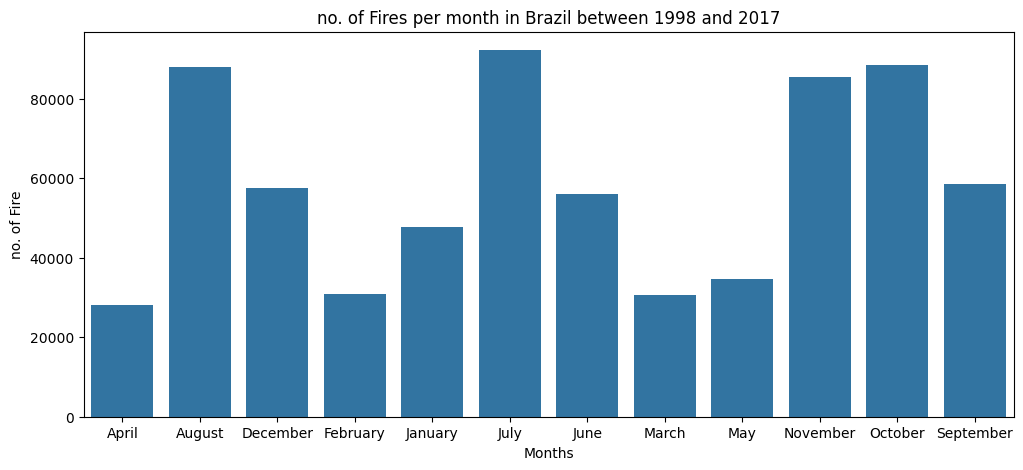

In [17]:
# the Maximum Number of Forest Fires Were Reported in every Month
max_men=df.groupby('month-eng')['number'].sum().reset_index()
plt.figure(figsize=(12,5))
sns.barplot(x='month-eng', y='number', data=max_men)
plt.title("no. of Fires per month in Brazil between 1998 and 2017")
plt.xlabel('Months')
plt.ylabel('no. of Fire') 

Text(0, 0.5, 'no. of Fire ')

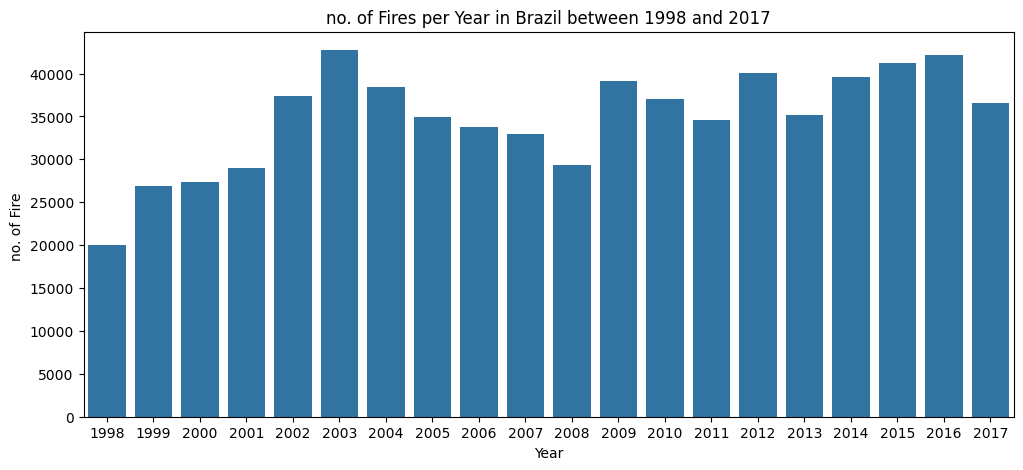

In [18]:
# the Maximum Number of Forest Fires Were Reported in every year
max_year=df.groupby('year')['number'].sum().reset_index()
plt.figure(figsize=(12,5))
sns.barplot(x='year', y='number', data=max_year)
plt.title("no. of Fires per Year in Brazil between 1998 and 2017")
plt.xlabel('Year')
plt.ylabel('no. of Fire ') 

<ipython-input-60-77e06bec97ea>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  max_sta== df.groupby(['state'])['number'].sum().sort_values(ascending = False)


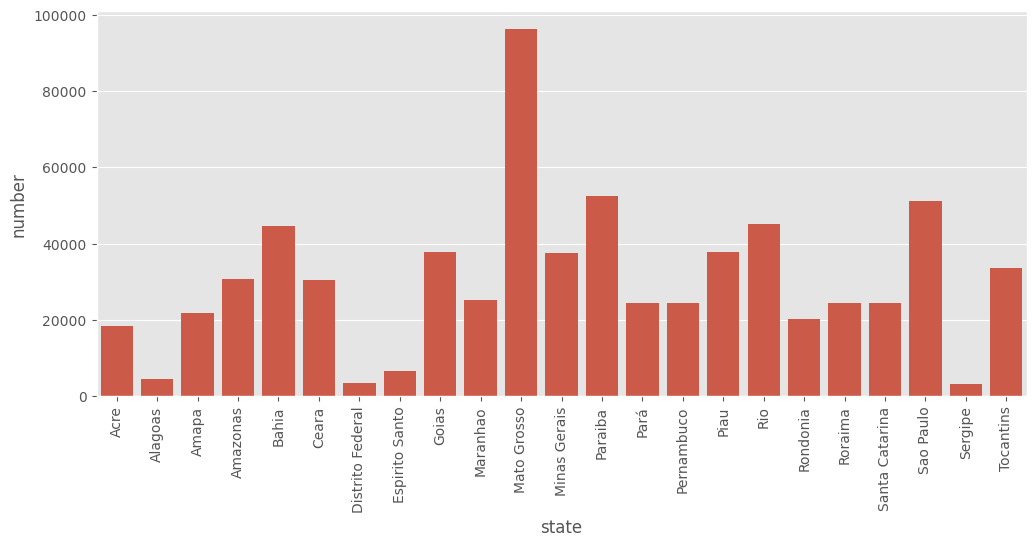

In [60]:
# the Maximum Number of Forest Fires Were Reported in every State
max_sta= df.groupby(['state'])['number'].sum().sort_values
plt.figure(figsize=(12,5))
sns.barplot(x='state', y='number', data=max_sta)
plt.xticks(rotation=90)
plt.show()
plt.title("no. of Fires per State in Brazil between 1998 and 2017")
plt.xlabel('State')
plt.ylabel('no. of Fire ') 


In [20]:
#Total Number of Fires Were Reported In Amazonas
df[df['state']=='Amazonas']['number'].sum()

30636

Text(0, 0.5, 'no. of Fire ')

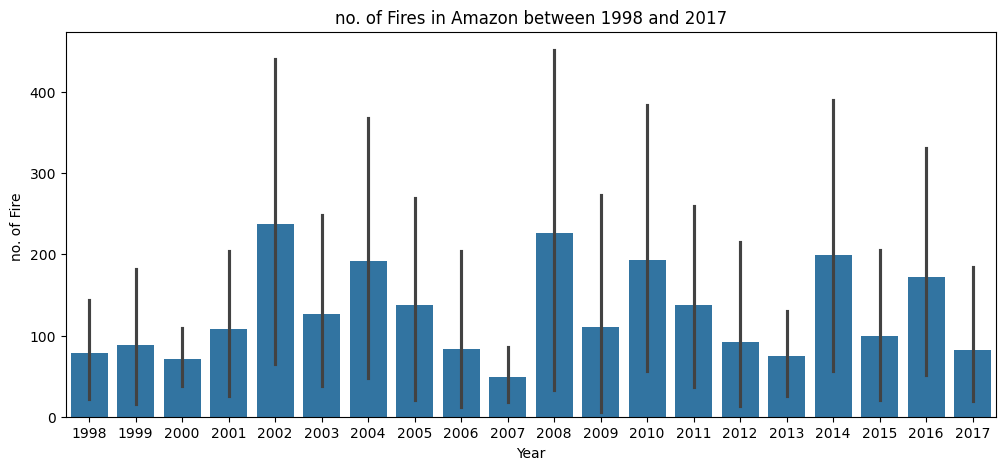

In [22]:
# Number of Fires Were Reported In Amazonas (Year-Wise)
ama_year=df[df['state']=='Amazonas']
data2=ama_year.groupby('year')['number'].sum().reset_index()
plt.figure(figsize=(12,5))
sns.barplot(x='year',y= 'number', data=ama_year)
plt.title("no. of Fires in Amazon between 1998 and 2017")
plt.xlabel('Year')
plt.ylabel('no. of Fire ') 

